In [29]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
print(df.head())
print(df.info())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

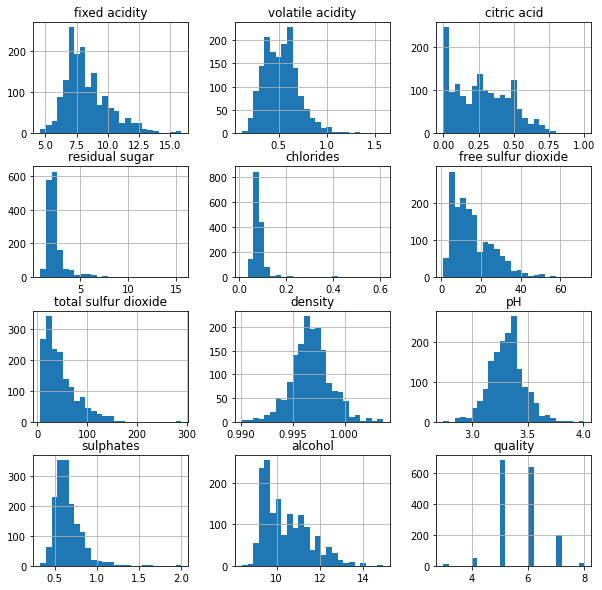

In [9]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

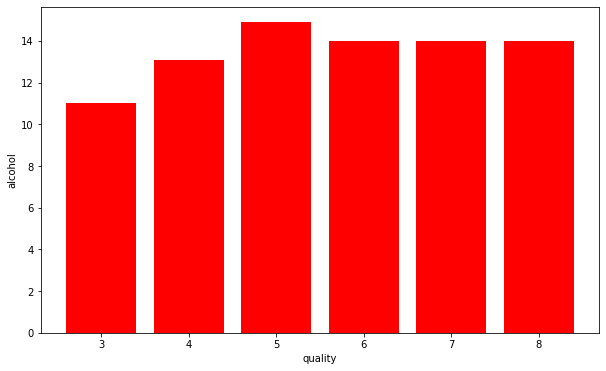

In [10]:
plt.figure(figsize=[10,6])
plt.bar(df['quality'],df['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

<AxesSubplot:>

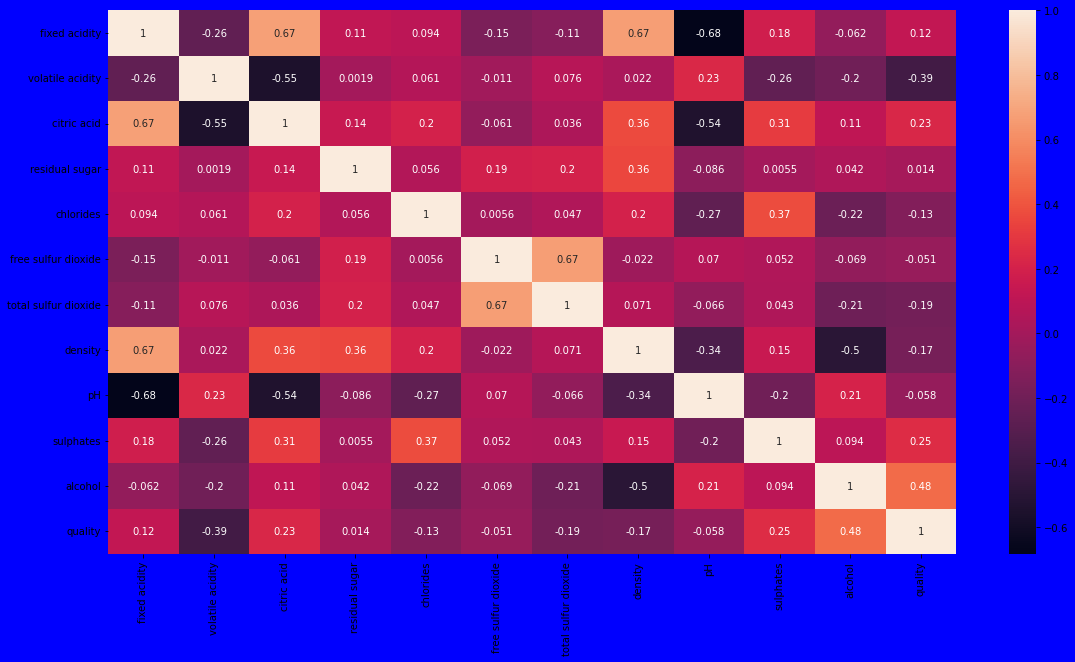

In [11]:
plt.figure(figsize=[19,10],facecolor='blue')
sb.heatmap(df.corr(),annot=True)

In [12]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

In [13]:
new_df=df.drop('total sulfur dioxide',axis=1)

In [14]:
new_df.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [15]:
new_df.update(new_df.fillna(new_df.mean()))


In [16]:
next_df = pd.get_dummies(new_df,drop_first=True)
next_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [21]:
cat = new_df.select_dtypes(include='O')
# create dummies of categorical columns
df_dummies = pd.get_dummies(new_df,drop_first = True)
print(df_dummies)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [26]:
df_dummies['best quality']=[1 if x>=7 else 0 for x in df.quality]
print(df_dummies)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [27]:
x = df_dummies.drop(['quality','best quality'],axis=1)
y = df_dummies['best quality']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

In [30]:
norm = MinMaxScaler()
norm_fit = norm.fit(xtrain)
scal_xtrain = norm_fit.transform(xtrain)
scal_xtest = norm_fit.transform(xtest)
print(scal_xtrain)

[[0.33628319 0.41322314 0.12       ... 0.50393701 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.42519685 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.32283465 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.51181102 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.44094488 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.47244094 0.14371257 0.24615385]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
rnd = RandomForestClassifier()
fit_rnd = rnd.fit(xtrain,ytrain)
rnd_score = rnd.score(xtest,ytest) 
print('score of model is : ',rnd_score) 
print('.................................') 
print('calculating the error') 
x_predict = list(rnd.predict(xtest))
df = {'predicted':x_predict,'original':ytest}
 print(classification_report(ytest,x_predict))

score of model is :  0.90625
.................................
calculating the error
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       272
           1       0.76      0.54      0.63        48

    accuracy                           0.91       320
   macro avg       0.84      0.76      0.79       320
weighted avg       0.90      0.91      0.90       320



In [38]:
pd.DataFrame(df).head(10)


,predicted,original
1035,0,1
49,0,0
799,0,0
538,0,1
660,0,0
990,0,0
398,0,0
1068,0,1
1155,0,0
468,0,0
